In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
np.random.seed(5)
plt.rcParams['figure.figsize'] = [10, 5]

iris = datasets.load_iris()
x = iris.data
y = iris.target

In [3]:
estimators = [
              ('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))
              ]

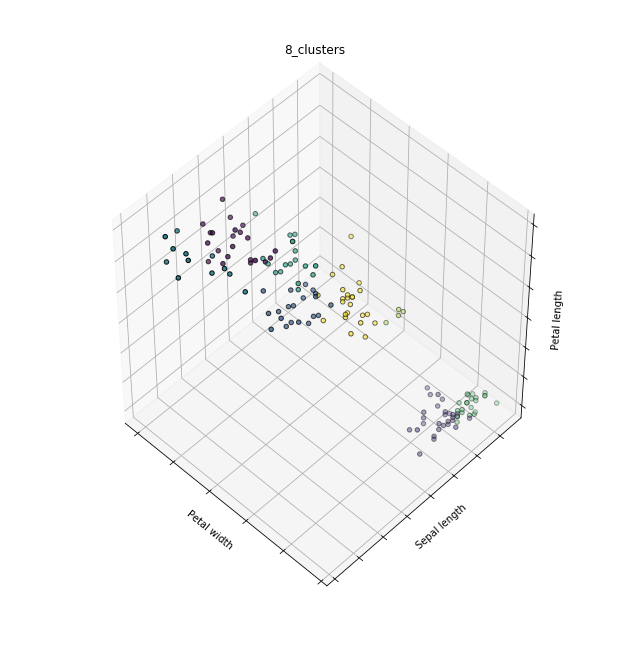

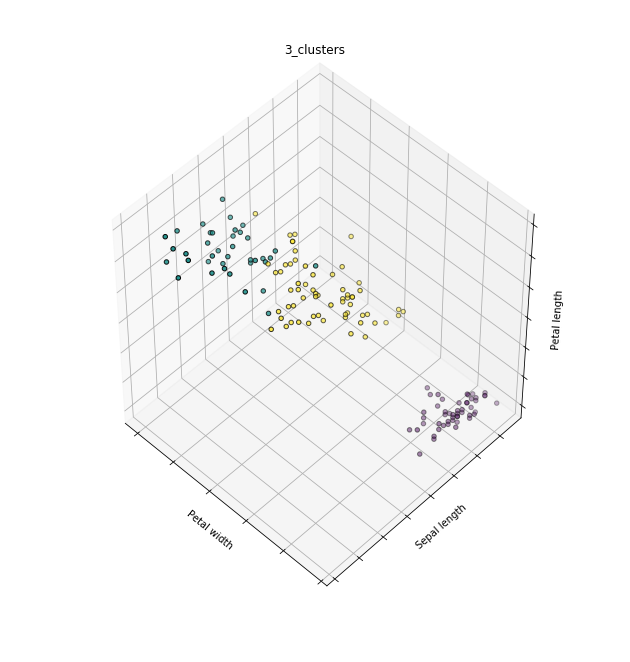

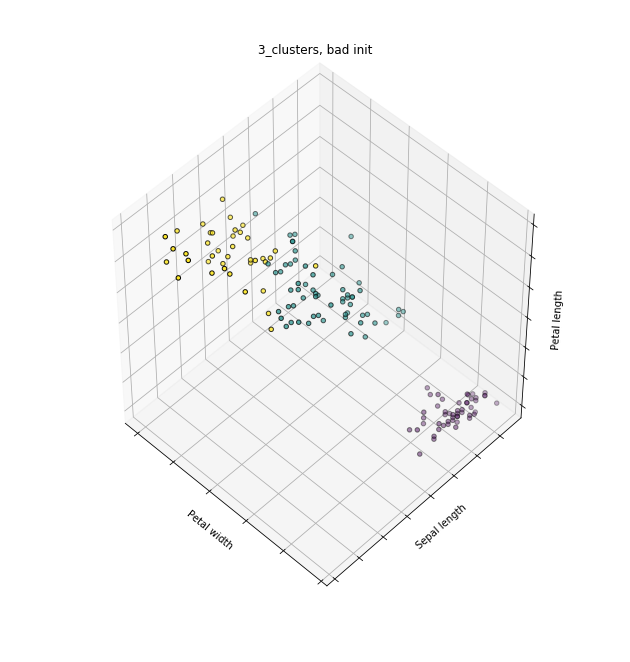

In [4]:
fignum = 1
titles = ['8_clusters', '3_clusters', '3_clusters, bad init']
for name, est in estimators:
  fig = plt.figure(fignum, figsize=(9, 9))
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
  est.fit(x)
  labels = est.labels_

  ax.scatter(x[:, 3], x[:, 0], x[:, 2], c = labels.astype(np.float), edgecolor='k')

  ax.w_xaxis.set_ticklabels([])
  ax.w_yaxis.set_ticklabels([])
  ax.w_zaxis.set_ticklabels([])

  ax.set_xlabel('Petal width')
  ax.set_ylabel('Sepal length')
  ax.set_zlabel('Petal length')

  ax.set_title(titles[fignum - 1])
  ax.dist = 12
  fignum = fignum + 1


C:\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


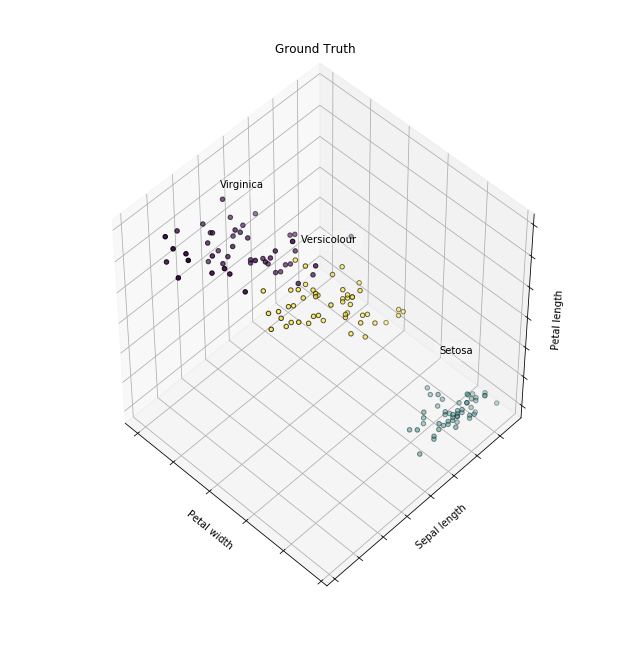

In [5]:
# ground truth plot
fig = plt.figure(fignum, figsize=(9, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1), 
                    ('Virginica', 2)]:
  ax.text3D(x[y == label, 3].mean(), x[y == label, 0].mean(), x[y == label, 2].mean() + 2, name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

ax.set_title("Ground Truth")
ax.dist = 12

fig.show()